# EXPLORATION 15 : Optical Character Recognition

## OCR 실습

### 루브릭 평가기준

|평가 기준|세부 사항|
|:--:|:--:|
|OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

### 기획 의도
최근 번역에 갑작스러운 관심이 생겼다. 언어도 책도 좋아하는 나에게 어쩌면 괜찮은 부업(?)이 될 수 있겠다는 생각이 든다. 그런 와중에 ex15 노드를 진행하다보니 문자를 미리 인식해서 1차적으로 컴퓨터가 번역을 한 뒤 사람이 검수하고 수정하면 조금 효율이 좋지 않을까? 라는 막연한 생각이 들었다. 모든 과정을 재현할 수는 없겠지만 일단 텍스트를 인식해야 번역을 하던 뭘 하지 않겠는가. 책의 내용을 얼마나 성공적으로 잡아내고, 인식할 수 있는지 실험해보자.

### 데이터셋 준비
구글에서 책 이미지를 아무렇게나 크롤링해서 준비했다.

In [1]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [2]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAzMjVfMjcy%2FMDAxNjE2NjE3Nzk4NzMw.163rR40k6_0srYVba2-ah8xt6m34pHlETH44o6pS7Csg.OJYsgBPkIyN0qbXb3qQJLh110UI-BWMQjlBVtFVMY2kg.JPEG.k0020080%2F20210323%25A3%25DF154115.jpg&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAyMjdfMjAg%2FMDAxNjE0NDEyNTcwMTI3.fHE5kNCzdRER1tMG6FtfJp2u0xRh8Hi9EtGWTQW801Mg.tNbAAoZHq6DFdZfVBI7e66f0isX9gNaXw00Ay7TP4Vcg.JPEG.travel_in_g%2FKakaoTalk_20210227_165412398_01.jpg&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAzMTNfMSAg%2FMDAxNjE1NjM0ODg1ODE4.gf5KfJm-x_umlQNgPifPRqEhLcEbhaJ1OHVyINOpFaAg.pG1tVcmECfz78iyfPWlhYcz_e1hCxh7azXRJCzy9sv8g.JPEG.binooshampoo%2F1615634874404.jpg&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTA0MDdfMTc0%2FMDAxNjE3Nzk2OTE4MTEy.ypC6WOxwl0rmmdGZnXlGSCeyZKDC6l_bV9jNeos5xsQg.Et8aP9E8kxKK9OtdHkYuDOv6s4425dg9OYlNF6ttFm8g.JPEG.yminlee%2F1617796908914.jpg&type=ofullfill340_600',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAyMjFfMjEy%2FMDAxNjEzODgxNjA3ODUy.9EajP0SfSQOMviNAJ6EkCC_Ug9Ndu6Wj7cD04JVPzu0g.qWhZyFr1De_y91k-rvVxH9I0LR31tI0pdKVV_WkpZh8g.JPEG.gkjw6601%2FIMG_6982.jpg&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTA1MDdfNDAg%2FMDAxNjIwMzg0NDg5NTI0.gunZfvhMkbh9TK3KMtlbBX3nkdyZB7S0-XRzuNael3cg.bJLLpVdI7d5PhdCWNAcMnyamSBnTCzYNkCA3-KdRqOMg.JPEG.jsbebe12%2FIMG_7610.JPG&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDEyMDRfMjc5%2FMDAxNjA3MDc4MDcyNjE4.nJI04AnARdcpmh95ewLus5qBzPcvloQaguZiXprYD_Mg.rJpZdY2B8xKVJgOUMPih6-uOt0Jm1NNZNw228Xy61YQg.JPEG.hangulshine%2FSE-d2e43617-3610-11eb-a121-31b0e349ae77.jpg&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAzMjlfMjUy%2FMDAxNjE3MDA4Njc3OTc0.RKicwRas4rm8lSm2mfXFD9atZ2_L1ssT43DDZcDl-wUg.QfV2swPIjKqpruqwoISBmd0nPgVEfnpZ9X2NrO8eoA4g.JPEG.ahirity%2FIMG_2446.JPG&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTAzMDhfMjU4%2FMDAxNjE1MTMzMDMyNzg5.gIL5d0sPaxaQdwJGB-sYlGfo8g6qyDBF5s54L-R2g68g.o4vEeQo0Nlu0_0pfX1hnq9-a1SdQCl4teF6vhEXk8Tcg.JPEG.qqrrsumin414%2FIMG_2684.JPG&type=a340',
    'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA1MTRfNTgg%2FMDAxNTg5NDAxNDYzNDUx.caBb1w5FrKBgdnp4Iw06eKl69ELMQsgVGEcnxtsT0bcg.TDalSk0lElX0WbeyOVbtBUIxfmSwcVGDJuYo-sr-x3Ag.JPEG.fjrql1%2FIMG_2259.jpg&type=a340'
    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

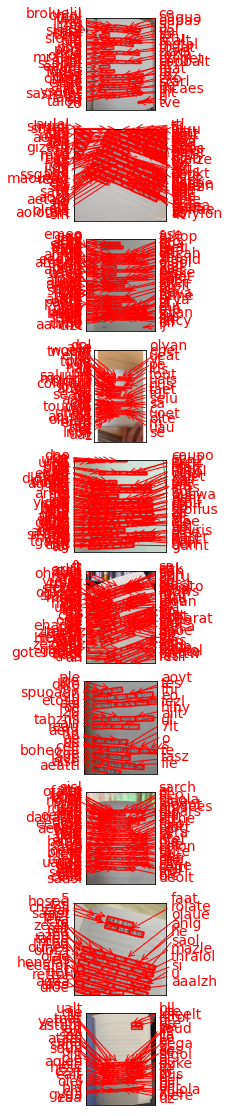

In [3]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [9]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [10]:
work_dir = os.getenv('HOME')+'/aiffel/E15/ocr_python'
for i in range(1,21):
    try:
        img_file_path = work_dir + '/train_data/' + str(i) + '.jpg'
        print(f'{i}번 사진')
        print()
        cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
    except SystemError:
        pass

1번 사진

/aiffel/aiffel/E15/ocr_python/0000.png
/aiffel/aiffel/E15/ocr_python/0001.png
/aiffel/aiffel/E15/ocr_python/0002.png
/aiffel/aiffel/E15/ocr_python/0003.png
/aiffel/aiffel/E15/ocr_python/0004.png
/aiffel/aiffel/E15/ocr_python/0005.png
/aiffel/aiffel/E15/ocr_python/0006.png
/aiffel/aiffel/E15/ocr_python/0007.png
/aiffel/aiffel/E15/ocr_python/0008.png
/aiffel/aiffel/E15/ocr_python/0009.png
/aiffel/aiffel/E15/ocr_python/0010.png
/aiffel/aiffel/E15/ocr_python/0011.png
/aiffel/aiffel/E15/ocr_python/0012.png
/aiffel/aiffel/E15/ocr_python/0013.png
/aiffel/aiffel/E15/ocr_python/0014.png
/aiffel/aiffel/E15/ocr_python/0015.png
/aiffel/aiffel/E15/ocr_python/0016.png
/aiffel/aiffel/E15/ocr_python/0017.png
/aiffel/aiffel/E15/ocr_python/0018.png
/aiffel/aiffel/E15/ocr_python/0019.png
/aiffel/aiffel/E15/ocr_python/0020.png
/aiffel/aiffel/E15/ocr_python/0021.png
/aiffel/aiffel/E15/ocr_python/0022.png
/aiffel/aiffel/E15/ocr_python/0023.png
/aiffel/aiffel/E15/ocr_python/0024.png
/aiffel/aiffel/E15

In [11]:
for i in range(1,21):
    print(f'{i}번 사진')
    print()
    recognize_images(cropped_image_path_list)

1번 사진

2


-




개의

| 공복

1 부는


매우

. 복잡해.

개는

=

우선

제

상으

의

온갖

구

1석:

구#

7썩-

을

몸득

(

1

로

부덧3

ㅣ

61

뒤

글

면서

290 쇼

=

낌을

을

자

|

의

것으로

삼<

ㅇ

Ｌ 해.

725 눈

로 귀 입.허.ㅋ

꼬

0

쉽^

\

없으

곤

리

겨

돌7

7

[면서

냄

내

물고

듣

1

썸고 호

고

. 할

1

빨고

헤치고

더

|끄

수

|고

달리고

고

수

|

고

엄

어

지

6 베

잎ㅇ

로

닝

/

1

히는


것이지.

맡고

보고

능고

느러고

~

이

세

상


몸:

오후

반<

르

}|내는

밖

법

을

익

0000 00

0

Done
2번 사진

2


-




개의

| 공복

1 부는


매우

. 복잡해.

개는

=

우선

제

상으

의

온갖

구

1석:

구#

7썩-

을

몸득

(

1

로

부덧3

ㅣ

61

뒤

글

면서

290 쇼

=

낌을

을

자

|

의

것으로

삼<

ㅇ

Ｌ 해.

725 눈

로 귀 입.허.ㅋ

꼬

0

쉽^

\

없으

곤

리

겨

돌7

7

[면서

냄

내

물고

듣

1

썸고 호

고

. 할

1

빨고

헤치고

더

|끄

수

|고

달리고

고

수

|

고

엄

어

지

6 베

잎ㅇ

로

닝

/

1

히는


것이지.

맡고

보고

능고

느러고

~

이

세

상


몸

# 회고

## ???

나름 노드들을 진행할 때는 가시적으로나 지표의 관점에서 봤을 때 꽤 합리적이고 납득할만한 결과가 나왔다고 생각하는데 이번 내용은 정말 형편없어 보인다. Detection까지는 어느 정도(keras의 시각화 내용을 볼 때) 잘 잡아낸다고 보여지는데 인식결과를 봤을 때 제대로 추출해낸 결과가 전혀 없다. 여러가지로 고도화할 수 있는 방법이 충분히 있을 것 같다. 나중에 한번 개인적으로 구현해보고 싶다. 노드에서 소개해준 CRAFT모델 등으로 해볼 수 있지 않을까.

## 편협함을 버리자

교육과정 자체에서 CV 혹은 NLP를 선택하는 절차를 거치다보니 너무 이분법적으로 생각한 것이 아닌가 싶다. 이번 노드만 하더라도 결국 이미지에서 문자이미지(?)를 추출해내는 과정과 추출된 문자를 해석하는 기술이 결합된 것이 아니던가. 해결하고자 하는 문제의 종류나 접근 방식 등등 많은 변수에 의해 필요한 기술들이 결합되어 사용될 수 있음을 상기하게 되었다. 컴퓨터 공학계열은 더더욱 이런 접근이 흔한 것 같기도 하고. 그런 의미에서 모든 분야에 대해서 어느정도 식견을 가지고 있어야 최소한 적용해보면 어떨까 하는 합리적인 의심을 해볼 수 있지 않을까 싶다. 컴돌이들은 죽을 때까지 공부한다고 하던데 빈 말이 아니구나 싶다. 지금이라도 도망쳐야 하나...